# O que são hiperparametros?

Variaveis inerentes de algoritimos utilizadas no treinamento sobre os dados. Cada tipo de algoritimo terá seus determinado conjunto de hiperparametros relevantes. Quando não alterados intencionamente, são utilizados valores pré determinados.


# Por que otimizao os hiperparametros?

Porque o modelo de previsão pode não alcançar seu melhor potêncial com os valores de hiperparametros padronizados.

# Como?

Grid Search: Busca exaustiva pela melhor combinação de valores de hiperparametros. Apresenta a desvantagem de ser custoso computacionalmente.

Random Search: Uma determinada quantidade de combinações de valores aleatórias é testada, geralmente proveniente de um número de combinações possíveis maior que as testadas no gridsearch.


In [ ]:
# Importar bibliotecas

import pandas as pd
import numpy as np

# Recurso Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto Treino/Teste
from sklearn.model_selection import train_test_split

# Calcular MAE e MSE/RMSE
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

# Importar GridSearch
from sklearn.model_selection import GridSearchCV

# Importar RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

# KNN
from sklearn.neighbors import KNeighborsRegressor

#Árvore de Decisão
from sklearn import tree

# Regressão Polinomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# SVR - SVM for Regression 
from sklearn.svm import SVR

# Calcular MSE/RMSE
from sklearn.metrics import mean_squared_error

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor

# XGBoost (NÃO É DO SCIKIT-LEARN)
import xgboost as xgb

# Leitura e ajuste do arquivo não disponíveis, assumir dataframe df com todas colunas numéricas.

In [ ]:
# Separar atributos preditores(X) do atributo meta (y)
y = df.tch
X = df.drop(['tch'],axis=1)

# Criar X_train, X_test, y_train, y_test com as proporções 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2020, test_size=0.3)

# Modelos Default (A) - Com GridSearchCV (B) - Com RandomSerchCV (C)
*   KNN - Mod1
*   Árvore de Decisão - Mod2
*   Random Forest - Mod3
*   GBoost - Mod4
*   XGBoost - Mod5
*   SVM - Mod6


In [ ]:
# KNN - Mod1A
# Definir modelo
knn = KNeighborsRegressor(metric='euclidean')

# Fazer o ajuste
Mod_1A = knn.fit(X_train,y_train)

# Fazer predição
y_pred_Mod_1A = Mod_1A.predict(X_test)

# Calcular RMSE
rmse_Mod_1A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_1A))

# Calcular MAE
mae_Mod_1A = mean_absolute_error(y_test,y_pred_Mod_1A)

print('mae =',mae_Mod_1A, 'rmse =', rmse_Mod_1A)

mae = 8.92056186770428 rmse = 13.547134230010213


In [ ]:
# KNN - Mod_1B - GridSeachCV
param_Mod_1B = [{'n_neighbors':np.arange(1,10,2)}]

Mod_1B = GridSearchCV(knn,param_grid=param_Mod_1B,cv=10, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', refit=True)
Mod_1B.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_1B = Mod_1B.predict(X_test)

# Calcular RMSE
rmse_Mod_1B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_1B))

# Calcular MAE
mae_Mod_1B = mean_absolute_error(y_test,y_pred_Mod_1B)

# imprimir mae e rmse
print('mae =',mae_Mod_1B, 'rmse =', rmse_Mod_1B)
# imprimit melhores hipermarametro
print(Mod_1B.best_params_)

mae = 5.839926070038911 rmse = 12.961768258278767
{'n_neighbors': 1}


In [ ]:
# KNN - Mod_1C = RandomizedSearchCV
param_Mod_1C = [{'n_neighbors':np.arange(1,30,2)}]

Mod_1C = RandomizedSearchCV(knn, param_distributions=param_Mod_1C, cv=10, 
                            random_state=2020, n_jobs=-1, n_iter=9,
                            scoring='neg_root_mean_squared_error');
Mod_1C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_1C = Mod_1C.predict(X_test)

# Calcular RMSE
rmse_Mod_1C = np.sqrt(mean_squared_error(y_test,y_pred_Mod_1C))

# Calcular MAE
mae_Mod_1C = mean_absolute_error(y_test,y_pred_Mod_1C)

# imprimir mae e rmse
print('mae =',mae_Mod_1C, 'rmse =', rmse_Mod_1C)
# Hiperparametros escolhidos
print(Mod_1C.best_params_);

mae = 7.6338780804150455 rmse = 12.952454031193366
{'n_neighbors': 3}


In [ ]:
# Árvore de Decisão - Mod_2A
# Definir modelo
arvore = tree.DecisionTreeRegressor(random_state=2020)

# Fazer o ajuste
Mod_2A = arvore.fit(X_train,y_train)

# Fazer predição
y_pred_Mod_2A = Mod_2A.predict(X_test)

# Calcular RMSE
rmse_Mod_2A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_2A))

# Calcular MAE
mae_Mod_2A = mean_absolute_error(y_test,y_pred_Mod_2A)

print('mae =',mae_Mod_2A, 'rmse =', rmse_Mod_2A)

mae = 6.878305512321661 rmse = 13.284486733388466


In [ ]:
# Árvore de Decisão - Mod_2B - GridSeachCV
param_Mod_2B = [{'max_depth':np.arange(10,31,1),
                 'min_samples_split':np.arange(2,10,1),
                 'min_samples_leaf':np.arange(1,10,1)
            }]

Mod_2B = GridSearchCV(arvore,param_grid=param_Mod_2B,cv=5, n_jobs=-1,
                                 scoring='neg_root_mean_squared_error')
Mod_2B.fit(X_train, y_train)
# Fazer predição
y_pred_Mod_2B = Mod_2B.predict(X_test)

# Calcular RMSE
rmse_Mod_2B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_2B))

# Calcular MAE
mae_Mod_2B = mean_absolute_error(y_test,y_pred_Mod_2B)

# imprimir mae e rmse
print('mae =',mae_Mod_2B, 'rmse =', rmse_Mod_2B)

# imprimir hiperparametros escolhidos
print(Mod_2B.best_params_)

mae = 8.308722687466501 rmse = 13.262986023942274
{'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Árvore de Decisão - Mod_2C = RandomizedSearchCV
param_Mod_2C = [{'max_depth':np.arange(1,100,1),
                 'min_samples_split':np.arange(2,40,1),
                 'min_samples_leaf':np.arange(1,40,1)}]

Mod_2C = RandomizedSearchCV(arvore, param_distributions=param_Mod_2C, cv=5, 
                            random_state=2020, n_jobs=-1, n_iter=50,
                            scoring='neg_root_mean_squared_error');
Mod_2C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_2C = Mod_2C.predict(X_test)

# Calcular RMSE
rmse_Mod_2C = np.sqrt(mean_squared_error(y_test,y_pred_Mod_2C))

# Calcular MAE
mae_Mod_2C = mean_absolute_error(y_test,y_pred_Mod_2C)

print('mae =',mae_Mod_2C, 'rmse =', rmse_Mod_2C)
# Hiperparametros escolhidos
print(Mod_2C.best_params_);
#Mod_2C.get_params() / parametros possiveis de tuning

mae = 8.682126918292978 rmse = 13.236996134056085
{'min_samples_split': 13, 'min_samples_leaf': 3, 'max_depth': 15}


In [ ]:
# Random Forest - Mod_3A
# Definir modelo
Regr_RF = RandomForestRegressor(random_state=2020,)

# Fazer o ajuste
Mod_3A = Regr_RF.fit(X_train,y_train)

# Fazer predição
y_pred_Mod_3A = Mod_3A.predict(X_test)

# Calcular RMSE
rmse_Mod_3A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_3A))

# Calcular MAE
mae_Mod_3A = mean_absolute_error(y_test,y_pred_Mod_3A)

print('mae =',mae_Mod_3A, 'rmse =', rmse_Mod_3A)

mae = 6.452300493336107 rmse = 9.976841550486526


In [ ]:
# Random Forest - Mod_3B - GridSeachCV
param_Mod_3B = [{'max_depth':np.arange(20,41,5),
                'n_estimators':np.arange(80,241,40)}]

Mod_3B = GridSearchCV(Regr_RF,param_grid = param_Mod_3B, cv=5, n_jobs=-1,
                      scoring='neg_root_mean_squared_error')
Mod_3B.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_3B = Mod_3B.predict(X_test)

# Calcular RMSE
rmse_Mod_3B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_3B))

# Calcular MAE
mae_Mod_3B = mean_absolute_error(y_test,y_pred_Mod_3B)

print('mae =',mae_Mod_3B, 'rmse =', rmse_Mod_3B)
# Hiperparametros escolhidos
print(Mod_3B.best_params_)
# print(Mod_3B.get_params())

mae = 6.46314472565368 rmse = 9.979981031378559
{'max_depth': 30, 'n_estimators': 200}


In [ ]:
# Random Forest - Mod_3C = RandomizedSearchCV
param_Mod_3C =  [{'max_depth':np.arange(1,100,1),
                  'n_estimators':np.arange(10,400,1)}]

Mod_3C = RandomizedSearchCV(Regr_RF, param_distributions = param_Mod_3C, cv=5,
                            random_state=2020, n_jobs=-1, n_iter=9, scoring='neg_root_mean_squared_error');
Mod_3C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_3C = Mod_3C.predict(X_test)

# Calcular RMSE
rmse_Mod_3C = np.sqrt(mean_squared_error(y_test, y_pred_Mod_3C))

# Calcular MAE
mae_Mod_3C = mean_absolute_error(y_test, y_pred_Mod_3C)

print('mae =',mae_Mod_3C, 'rmse =', rmse_Mod_3C)

# Hiperparametros escolhidos
print(Mod_3C.best_params_);

mae = 6.435266203106514 rmse = 9.956995697488342
{'n_estimators': 367, 'max_depth': 53}


In [ ]:
# GBoost - Mod_4A
# Definir modelo
Regr_GB = GradientBoostingRegressor(random_state=2020)

# Fazer o ajuste
Mod_4A = Regr_GB.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_4A = Mod_4A.predict(X_test)

# Calcular RMSE
rmse_Mod_4A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_4A))

# Calcular MAE
mae_Mod_4A = mean_absolute_error(y_test,y_pred_Mod_4A)

print('mae =',mae_Mod_4A, 'rmse =', rmse_Mod_4A)

mae = 11.983549580022775 rmse = 15.320053433296648


In [ ]:
# GBoost - Mod_4B - GridSeachCV
param_Mod_4B = [{'max_depth':np.arange(1,10,2),
                 'n_estimators':np.arange(280,321,40)}]

Mod_4B = GridSearchCV(Regr_GB, param_grid = param_Mod_4B, cv=5, n_jobs=-1,
                      scoring='neg_root_mean_squared_error')
Mod_4B.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_4B = Mod_4B.predict(X_test)

# Calcular RMSE
rmse_Mod_4B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_4B))

# Calcular MAE
mae_Mod_4B = mean_absolute_error(y_test,y_pred_Mod_4B)

print('mae =',mae_Mod_4B, 'rmse =', rmse_Mod_4B)

#Hiperparametros escolhidos
print(Mod_4B.best_params_)

mae = 6.308243496991282 rmse = 9.896034885848966
{'max_depth': 9, 'n_estimators': 320}


In [ ]:
# GBoost - Mod_4C = RandomizedSearchCV
param_Mod_4C =  [{'max_depth':np.arange(1,40,1),
                  'n_estimators':np.arange(10,300,10)}]

Mod_4C = RandomizedSearchCV(Regr_GB, param_distributions=param_Mod_4C, cv=5, 
                            random_state=2020, n_jobs=-1, n_iter=9,
                            scoring='neg_root_mean_squared_error');
Mod_4C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_4C = Mod_4C.predict(X_test)

# Calcular RMSE
rmse_Mod_4C = np.sqrt(mean_squared_error(y_test,y_pred_Mod_4C))

# Calcular MAE
mae_Mod_4C = mean_absolute_error(y_test,y_pred_Mod_4C)

print('mae =',mae_Mod_4C, 'rmse =', rmse_Mod_4C)
# Hiperparametros escolhidos
print(Mod_4C.best_params_)

mae = 6.025975594592272 rmse = 10.565304077865337
{'n_estimators': 160, 'max_depth': 14}


In [ ]:
# XGBoost - Mod_5A
# Definir modelo
Regr_XGB = xgb.XGBRFRegressor(objective='reg:squarederror', random_state=2020)

# Fazer o ajuste
Mod_5A = Regr_XGB.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_5A = Mod_5A.predict(X_test)

# Calcular RMSE
rmse_Mod_5A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_5A))

# Calcular MAE
mae_Mod_5A = mean_absolute_error(y_test,y_pred_Mod_5A)

print('mae =',mae_Mod_5A, 'rmse =', rmse_Mod_5A)

mae = 14.502049047032218 rmse = 18.050176014253925


In [ ]:
# XGBoost - Mod_5B - GridSeachCV
param_Mod_5B = [{'max_depth':np.arange(8,29,4),
                'n_estimators':np.arange(20,181,40)}]

Mod_5B = GridSearchCV(Regr_XGB,param_grid = param_Mod_5B, cv=5, n_jobs=-1,
                      scoring='neg_root_mean_squared_error')
Mod_5B.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_5B = Mod_5B.predict(X_test)

# Calcular RMSE
rmse_Mod_5B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_5B))

# Calcular MAE
mae_Mod_5B = mean_absolute_error(y_test,y_pred_Mod_5B)

print('mae =',mae_Mod_5B, 'rmse =', rmse_Mod_5B)

# Hiperparametros escolhidos
print(Mod_5B.best_params_)

mae = 10.609873661471712 rmse = 13.967147782134841
{'max_depth': 20, 'n_estimators': 60}


In [ ]:
# XGBoost - Mod_5C = RandomizedSearchCV
param_Mod_5C =  [{'max_depth':np.arange(1,100,1),
                'n_estimators':np.arange(1,300,1)}]

Mod_5C = RandomizedSearchCV(Regr_XGB, param_distributions=param_Mod_5C, cv=5, 
                            random_state=2020, n_jobs=-1, n_iter=9,
                            scoring='neg_root_mean_squared_error');
Mod_5C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_5C = Mod_5C.predict(X_test)

# Calcular RMSE
rmse_Mod_5C = np.sqrt(mean_squared_error(y_test,y_pred_Mod_5C))

# Calcular MAE
mae_Mod_5C = mean_absolute_error(y_test,y_pred_Mod_5C)

print('mae =',mae_Mod_5C, 'rmse =', rmse_Mod_5C)
# Hiperparametros escolhidos
print(Mod_5C.best_params_);

mae = 10.606308531824252 rmse = 13.96816788756913
{'n_estimators': 62, 'max_depth': 98}


In [ ]:
# SVM - Mod_6A 
# Definir regressor
regressor = SVR(kernel='rbf')

# Fazer ajuste
Mod_6A = regressor.fit(X_train,y_train)

# Fazer predição
y_pred_Mod_6A = Mod_6A.predict(X_test)

# Calcular RMSE
rmse_Mod_6A = np.sqrt(mean_squared_error(y_test,y_pred_Mod_6A))

# Calcular MAE
mae_Mod_6A = mean_absolute_error(y_test,y_pred_Mod_6A)

print('mae =',mae_Mod_6A, 'rmse =', rmse_Mod_6A)

mae = 16.00963738792142 rmse = 19.967066186428195


In [ ]:
# SVM - Mod_6B - GridSeachCV
param_Mod_6B = [{'gamma':[0.001,0.01,0.05,0.1,1],
                 'C':np.arange(200,801,100)}]

Mod_6B = GridSearchCV(regressor,param_grid=param_Mod_6B, cv=5, n_jobs=-1,
                      scoring='neg_root_mean_squared_error')
Mod_6B.fit(X_train, y_train)

# Fazer predição
y_pred_Mod_6B = Mod_6B.predict(X_test)

# Calcular RMSE
rmse_Mod_6B = np.sqrt(mean_squared_error(y_test,y_pred_Mod_6B))

# Calcular MAE
mae_Mod_6B = mean_absolute_error(y_test,y_pred_Mod_6B)

print('mae =',mae_Mod_6B, 'rmse =', rmse_Mod_6B)
# Hiperparametros escolhidos
print(Mod_6B.best_params_);

mae = 6.505431917600256 rmse = 11.936082397792578
{'C': 400, 'gamma': 0.01}


In [ ]:
# SVM - Mod_6C = RandomizedSearchCV
param_Mod_6C = [{'gamma':np.arange(1e-3,1e4,1e-3),
                'C':np.arange(1e-3,1e4,1e-3)}]

Mod_6C = RandomizedSearchCV(regressor, param_distributions=param_Mod_6C, cv=5, 
                             random_state=2020, n_jobs=-1, n_iter=9,scoring='neg_root_mean_squared_error');
Mod_6C.fit(X_train, y_train);

# Fazer predição
y_pred_Mod_6C = Mod_6C.predict(X_test)

# Calcular RMSE
rmse_Mod_6C = np.sqrt(mean_squared_error(y_test,y_pred_Mod_6C))

# Calcular MAE
mae_Mod_6C = mean_absolute_error(y_test,y_pred_Mod_6C)

print('mae =',mae_Mod_6C, 'rmse =', rmse_Mod_6C)
# Hiperparametros escolhidos
print(Mod_6C.best_params_);

mae = 14.373880970000341 rmse = 19.089415743709516
{'gamma': 5408.722000000001, 'C': 713.807}


## Construir os gráficos  ('erros' e 'y_pred x y_real')


In [ ]:
#Dataframe com resultados mae e rmse

rmse_A_results = pd.Series([rmse_Mod_1A, rmse_Mod_2A, rmse_Mod_3A, rmse_Mod_4A, rmse_Mod_5A, rmse_Mod_6A])
rmse_B_results = pd.Series([rmse_Mod_1B, rmse_Mod_2B, rmse_Mod_3B, rmse_Mod_4B, rmse_Mod_5B, rmse_Mod_6B])
rmse_C_results = pd.Series([rmse_Mod_1C, rmse_Mod_2C, rmse_Mod_3C, rmse_Mod_4C, rmse_Mod_5C, rmse_Mod_5C])

mae_A_results = pd.Series([mae_Mod_1A, mae_Mod_2A, mae_Mod_3A, mae_Mod_4A, mae_Mod_5A, mae_Mod_6A])
mae_B_results = pd.Series([mae_Mod_1B, mae_Mod_2B, mae_Mod_3B, mae_Mod_4B, mae_Mod_5B, mae_Mod_6B])
mae_C_results = pd.Series([mae_Mod_1C, mae_Mod_2C, mae_Mod_3C, mae_Mod_4C, mae_Mod_5C, mae_Mod_5C])

Modelos = pd.Series(['KNN','Árvore de Decisão','Random Forest','GBoost','XGBoost','SVM'])
df_resultados = pd.DataFrame({'Modelo':Modelos,
                              'RMSE Default':rmse_A_results,'RMSE GridSearchCV':rmse_B_results,'RMSE RandomSearchCV':rmse_C_results,
                              'MAE Default':mae_A_results,'MAE GridSearchCV':mae_B_results,'MAE RandomSearchCV':mae_C_results
                              })
df_resultados.to_csv('resultados.csv')

In [ ]:
df_resultados

,Modelo,RMSE Default,RMSE GridSearchCV,RMSE RandomSearchCV,MAE Default,MAE GridSearchCV,MAE RandomSearchCV
0,KNN,13.547134,12.961768,12.952454,8.920562,5.839926,7.633878
1,Árvore de Decisão,13.284487,13.262986,13.236996,6.878306,8.308723,8.682127
2,Random Forest,9.976842,9.979981,9.956996,6.452300,6.463145,6.435266
3,GBoost,15.320053,9.896035,10.565304,11.983550,6.308243,6.025976
4,XGBoost,18.050176,13.967148,13.968168,14.502049,10.609874,10.606309
5,SVM,19.967066,11.936082,13.968168,16.009637,6.505432,10.606309


In [ ]:
# Dataframa para histogramas e y_real vs y_predito
df_hist = pd.DataFrame({'y_real':y_test,
                        'y_pred_1A':y_pred_Mod_1A, 'modulo_erros_1A':abs(y_pred_Mod_1A - y_test),'erros_1A':(y_pred_Mod_1A - y_test),
                        'y_pred_2A':y_pred_Mod_2A, 'modulo_erros_2A':abs(y_pred_Mod_2A - y_test),'erros_2A':(y_pred_Mod_2A - y_test),
                        'y_pred_3A':y_pred_Mod_3A, 'modulo_erros_3A':abs(y_pred_Mod_3A - y_test),'erros_3A':(y_pred_Mod_3A - y_test),
                        'y_pred_4A':y_pred_Mod_4A, 'modulo_erros_4A':abs(y_pred_Mod_4A - y_test),'erros_4A':(y_pred_Mod_4A - y_test),
                        'y_pred_5A':y_pred_Mod_5A, 'modulo_erros_5A':abs(y_pred_Mod_5A - y_test),'erros_5A':(y_pred_Mod_5A - y_test),
                        'y_pred_6A':y_pred_Mod_6A, 'modulo_erros_6A':abs(y_pred_Mod_6A - y_test),'erros_6A':(y_pred_Mod_6A - y_test),

                        'y_pred_1B':y_pred_Mod_1B, 'modulo_erros_1B':abs(y_pred_Mod_1B - y_test),'erros_1B':(y_pred_Mod_1B - y_test),
                        'y_pred_2B':y_pred_Mod_2B, 'modulo_erros_2B':abs(y_pred_Mod_2B - y_test),'erros_2B':(y_pred_Mod_2B - y_test),
                        'y_pred_3B':y_pred_Mod_3B, 'modulo_erros_3B':abs(y_pred_Mod_3B - y_test),'erros_3B':(y_pred_Mod_3B - y_test),
                        'y_pred_4B':y_pred_Mod_4B, 'modulo_erros_4B':abs(y_pred_Mod_4B - y_test),'erros_4B':(y_pred_Mod_4B - y_test),
                        'y_pred_5B':y_pred_Mod_5B, 'modulo_erros_5B':abs(y_pred_Mod_5B - y_test),'erros_5B':(y_pred_Mod_5B - y_test),
                        'y_pred_6B':y_pred_Mod_6B, 'modulo_erros_6B':abs(y_pred_Mod_6B - y_test),'erros_6B':(y_pred_Mod_6B - y_test),

                        'y_pred_1C':y_pred_Mod_1C, 'modulo_erros_1C':abs(y_pred_Mod_1C - y_test),'erros_1C':(y_pred_Mod_1C - y_test),
                        'y_pred_2C':y_pred_Mod_2C, 'modulo_erros_2C':abs(y_pred_Mod_2C - y_test),'erros_2C':(y_pred_Mod_2C - y_test),
                        'y_pred_3C':y_pred_Mod_3C, 'modulo_erros_3C':abs(y_pred_Mod_3C - y_test),'erros_3C':(y_pred_Mod_3C - y_test),
                        'y_pred_4C':y_pred_Mod_4C, 'modulo_erros_4C':abs(y_pred_Mod_4C - y_test),'erros_4C':(y_pred_Mod_4C - y_test),
                        'y_pred_5C':y_pred_Mod_5C, 'modulo_erros_5C':abs(y_pred_Mod_5C - y_test),'erros_5C':(y_pred_Mod_5C - y_test),
                        'y_pred_6C':y_pred_Mod_6C, 'modulo_erros_6C':abs(y_pred_Mod_6C - y_test),'erros_6C':(y_pred_Mod_6C - y_test)                       
                         })
df_hist.to_csv('hist.csv')

In [ ]:
df_hist

,Unnamed: 0,y_real,y_pred_1A,modulo_erros_1A,erros_1A,y_pred_2A,modulo_erros_2A,erros_2A,y_pred_3A,modulo_erros_3A,erros_3A,y_pred_4A,modulo_erros_4A,erros_4A,y_pred_5A,modulo_erros_5A,erros_5A,y_pred_6A,modulo_erros_6A,erros_6A,y_pred_1B,modulo_erros_1B,erros_1B,y_pred_2B,modulo_erros_2B,erros_2B,y_pred_3B,modulo_erros_3B,erros_3B,y_pred_4B,modulo_erros_4B,erros_4B,y_pred_5B,modulo_erros_5B,erros_5B,y_pred_6B,modulo_erros_6B,erros_6B,y_pred_1C,modulo_erros_1C,erros_1C,y_pred_2C,modulo_erros_2C,erros_2C,y_pred_3C,modulo_erros_3C,erros_3C,y_pred_4C,modulo_erros_4C,erros_4C,y_pred_5C,modulo_erros_5C,erros_5C,y_pred_6C,modulo_erros_6C,erros_6C
0,2168,46.29,59.310,13.020,13.020,58.97,12.68,12.68,60.029467,13.739467,13.739467,62.453961,16.163961,16.163961,55.589176,9.299176,9.299176,67.697778,21.407778,21.407778,58.97,12.68,12.68,46.097500,0.192500,-0.192500,57.937508,11.647508,11.647508,54.590955,8.300955,8.300955,58.880074,12.590074,12.590074,59.135619,12.845619,12.845619,51.623333,5.333333,5.333333,43.075556,3.214444,-3.214444,57.677525,11.387525,11.387525,51.264562,4.974562,4.974562,59.100033,12.810033,12.810033,63.355997,17.065997,17.065997
1,4339,73.05,70.052,2.998,-2.998,73.07,0.02,0.02,68.792100,4.257900,-4.257900,68.840064,4.209936,-4.209936,69.224144,3.825856,-3.825856,67.756858,5.293142,-5.293142,73.07,0.02,0.02,67.515000,5.535000,-5.535000,68.762245,4.287755,-4.287755,70.591852,2.458148,-2.458148,70.252220,2.797780,-2.797780,74.098939,1.048939,1.048939,70.133333,2.916667,-2.916667,64.806471,8.243529,-8.243529,69.067357,3.982643,-3.982643,69.348379,3.701621,-3.701621,70.385750,2.664250,-2.664250,63.355997,9.694003,-9.694003
2,6714,41.73,46.584,4.854,4.854,63.08,21.35,21.35,46.867200,5.137200,5.137200,58.058753,16.328753,16.328753,53.112640,11.382640,11.382640,60.476840,18.746840,18.746840,41.75,0.02,0.02,31.087500,10.642500,-10.642500,48.203797,6.473797,6.473797,47.472731,5.742731,5.742731,48.352240,6.622242,6.622242,51.151841,9.421841,9.421841,41.753333,0.023333,0.023333,54.348750,12.618750,12.618750,48.569812,6.839812,6.839812,43.192186,1.462186,1.462186,48.322560,6.592559,6.592559,63.355997,21.625997,21.625997
3,3785,58.78,74.854,16.074,16.074,58.73,0.05,-0.05,66.486225,7.706225,7.706225,66.032545,7.252545,7.252545,68.072670,9.292670,9.292670,66.053151,7.273151,7.273151,79.79,21.01,21.01,65.242500,6.462500,6.462500,66.906158,8.126158,8.126158,68.819005,10.039005,10.039005,72.660690,13.880690,13.880690,66.365489,7.585489,7.585489,75.676667,16.896667,16.896667,61.731250,2.951250,2.951250,66.912641,8.132641,8.132641,66.208209,7.428209,7.428209,72.693880,13.913878,13.913878,63.355997,4.575997,4.575997
4,10424,79.89,79.870,0.020,-0.020,79.90,0.01,0.01,76.245850,3.644150,-3.644150,60.177054,19.712946,-19.712946,52.625930,27.264069,-27.264069,61.655226,18.234774,-18.234774,79.84,0.05,-0.05,78.247778,1.642222,-1.642222,76.260833,3.629167,-3.629167,75.897272,3.992728,-3.992728,63.664467,16.225533,-16.225533,79.842979,0.047021,-0.047021,79.880000,0.010000,-0.010000,76.921282,2.968718,-2.968718,76.391394,3.498606,-3.498606,79.735593,0.154407,-0.154407,63.730090,16.159909,-16.159909,63.355997,16.534003,-16.534003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,7707,32.40,44.206,11.806,11.806,37.53,5.13,5.13,46.592100,14.192100,14.192100,58.409636,26.009636,26.009636,61.813538,29.413538,29.413538,53.141171,20.741171,20.741171,44.59,12.19,12.19,41.161667,8.761667,8.761667,45.056500,12.656500,12.656500,44.937803,12.537803,12.537803,51.018497,18.618497,18.618497,63.865582,31.465582,31.465582,48.660000,16.260000,16.260000,41.161667,8.761667,8.761667,45.484087,13.084087,13.084087,42.503696,10.103696,10.103696,50.753857,18.353857,18.353857,63.355997,30.955997,30.955997
2566,11904,51.34,52.042,0.702,0.702,75.12,23.78,23.78,75.969100,24.629100,24.629100,70.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_resultados = pd.read_csv('resultados.csv')
df_hist = pd.read_csv('hist.csv')

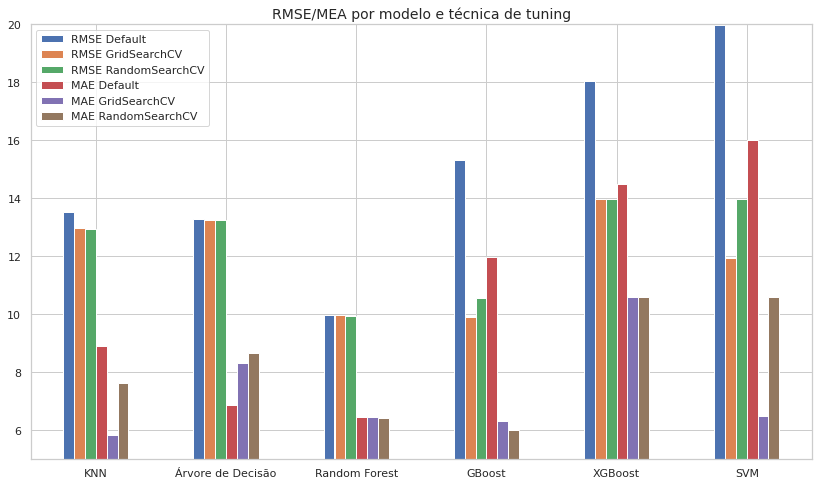

<Figure size 432x288 with 0 Axes>

In [ ]:
#Bar plot
sns.set(style="whitegrid")
df_resultados[["Modelo", "RMSE Default", "RMSE GridSearchCV", "RMSE RandomSearchCV",
                "MAE Default", "MAE GridSearchCV", "MAE RandomSearchCV"]].plot(x="Modelo", kind="bar", rot=0,figsize=(14, 8))

plt.title('RMSE/MEA por modelo e técnica de tuning',fontsize=14);
plt.ylim(5,20)
plt.xlabel('')
plt.savefig('ErrosbyMod_Barra.png', dpi=300);
plt.figure();

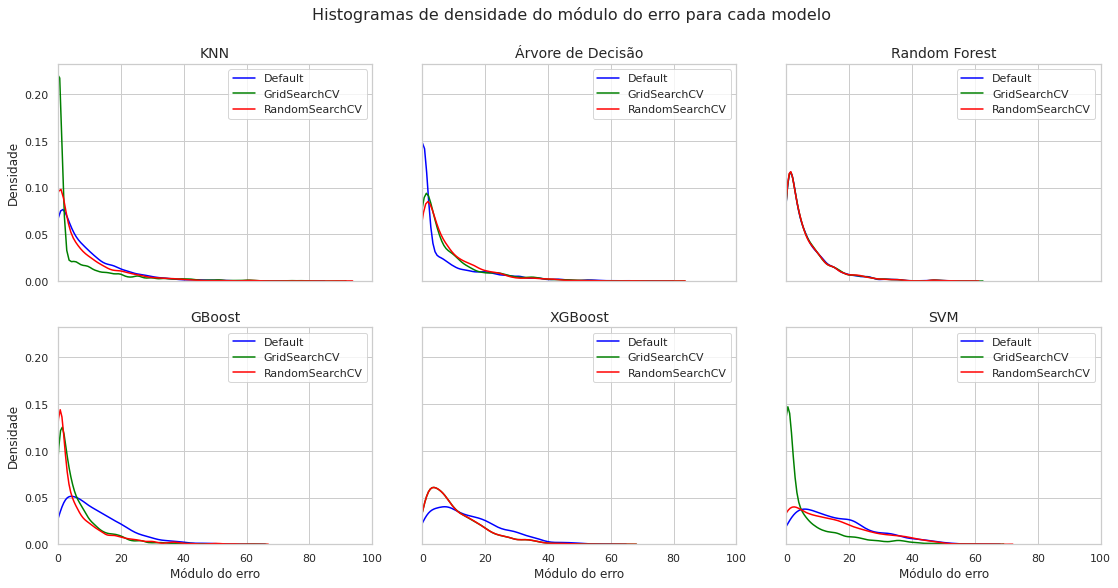

In [ ]:
# Histogramas módulo dos erros
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True,sharey=True)
plt.xlim(0,100)
plt.tight_layout(3)

sns.set(style="whitegrid")
plt.suptitle("Histogramas de densidade do módulo do erro para cada modelo", y=1.03,fontsize=16)

# KNN
sns.distplot(df_hist['modulo_erros_1A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[0, 0])

sns.distplot(df_hist['modulo_erros_1B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[0, 0])

sns.distplot(df_hist['modulo_erros_1C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[0, 0])

axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Densidade')
axes[0,0].set_title('KNN', fontsize=14)

#Árvore de Decisão
sns.distplot(df_hist['modulo_erros_2A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[0, 1])

sns.distplot(df_hist['modulo_erros_2B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[0, 1])

sns.distplot(df_hist['modulo_erros_2C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[0, 1])

axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Árvore de Decisão', fontsize=14)

#Random Forest
sns.distplot(df_hist['modulo_erros_3A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[0, 2])

sns.distplot(df_hist['modulo_erros_3B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[0, 2])

sns.distplot(df_hist['modulo_erros_3C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[0, 2])

axes[0,2].set_xlabel('')
axes[0,2].set_ylabel('')
axes[0,2].set_title('Random Forest', fontsize=14)

#GBoost
sns.distplot(df_hist['modulo_erros_4A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[1, 0])

sns.distplot(df_hist['modulo_erros_4B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[1, 0])

sns.distplot(df_hist['modulo_erros_4C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[1, 0])

axes[1,0].set_xlabel('Módulo do erro')
axes[1,0].set_ylabel('Densidade')
axes[1,0].set_title('GBoost', fontsize=14)

#XGBoost
sns.distplot(df_hist['modulo_erros_5A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[1, 1])

sns.distplot(df_hist['modulo_erros_5B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[1, 1])

sns.distplot(df_hist['modulo_erros_5C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[1, 1])

axes[1,1].set_xlabel('Módulo do erro')
axes[1,1].set_ylabel('')
axes[1,1].set_title('XGBoost', fontsize=14)

#SVM
sns.distplot(df_hist['modulo_erros_6A'], hist=False, kde=True, 
             bins=10, color = 'blue',label = 'Default',
             ax=axes[1, 2])

sns.distplot(df_hist['modulo_erros_6B'], hist=False, kde=True, 
             bins=10, color = 'green', label = 'GridSearchCV',
             ax=axes[1, 2])

sns.distplot(df_hist['modulo_erros_6C'], hist=False, kde=True, 
             bins=10, color = 'red', label = 'RandomSearchCV',
             ax=axes[1, 2])

axes[1,2].set_xlabel('Módulo do erro')
axes[1,2].set_ylabel('')
axes[1,2].set_title('SVM', fontsize=14)

plt.savefig('histrogramas.png', dpi=300)

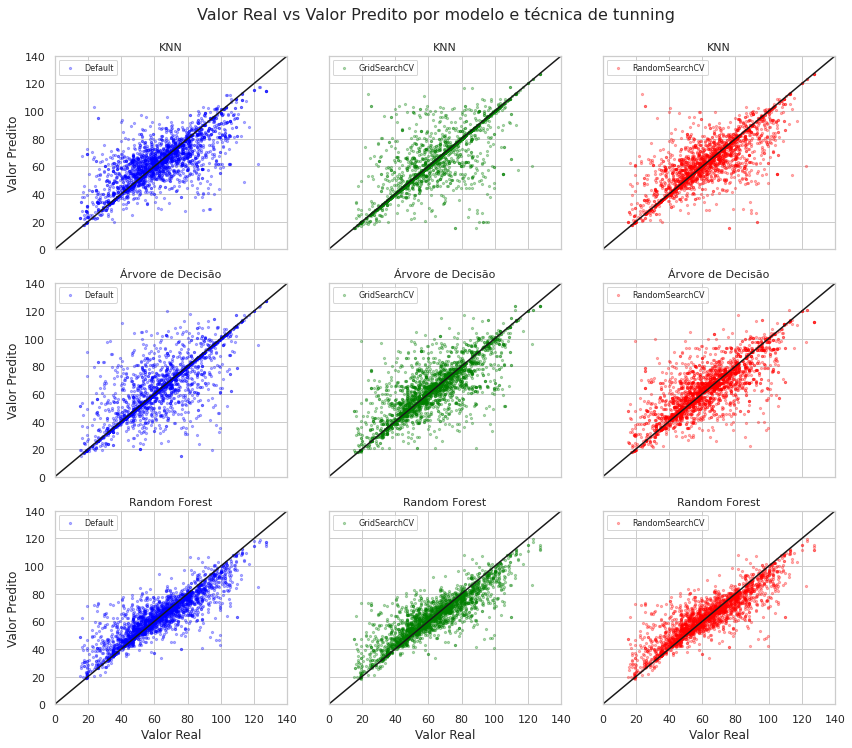

In [ ]:
#4.b.4) Para cada modelo, construa um gráfico com layout semelhante ao apresentado na figura abaixo:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.tight_layout(2);
plt.xlim(0,140)
plt.ylim(0,140)
sns.set(style="whitegrid")
plt.suptitle("Valor Real vs Valor Predito por modelo e técnica de tunning", y=1.03,fontsize=16)

x = [0,140]
y = [0,140]

#KNN
axes[0,0].plot(x,y,"k-");
axes[0,0].scatter(x='y_real', y='y_pred_1A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[0,0].legend(loc="upper left", fontsize=8)
axes[0,0].set_ylabel('Valor Predito')
axes[0,0].set_xlabel('')
axes[0,0].set_title('KNN', fontsize=11)

axes[0,1].plot(x,y,"k-");
axes[0,1].scatter(x='y_real', y='y_pred_1B', data=df_hist, c='green', s=5, alpha = 0.3, label = 'GridSearchCV')
axes[0,1].legend(loc="upper left", fontsize=8)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_title('KNN', fontsize=11)

axes[0,2].plot(x,y,"k-");
axes[0,2].scatter(x='y_real', y='y_pred_1C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[0,2].legend(loc="upper left", fontsize=8)
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('')
axes[0,2].set_title('KNN', fontsize=11)

#Árvore de Decisão
axes[1,0].plot(x,y,"k-");
axes[1,0].scatter(x='y_real', y='y_pred_2A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[1,0].legend(loc="upper left", fontsize=8)
axes[1,0].set_ylabel('Valor Predito')
axes[1,0].set_xlabel('')
axes[1,0].set_title('Árvore de Decisão', fontsize=11)

axes[1,1].plot(x,y,"k-");
axes[1,1].scatter(x='y_real', y='y_pred_2B', data=df_hist, c='green', s=5, alpha = 0.3, label = 'GridSearchCV')
axes[1,1].legend(loc="upper left", fontsize=8)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_title('Árvore de Decisão', fontsize=11)

axes[1,2].plot(x,y,"k-");
axes[1,2].scatter(x='y_real', y='y_pred_2C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[1,2].legend(loc="upper left", fontsize=8)
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('')
axes[1,2].set_title('Árvore de Decisão', fontsize=11)

#Random Forest
axes[2,0].plot(x,y,"k-");
axes[2,0].scatter(x='y_real', y='y_pred_3A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[2,0].legend(loc="upper left", fontsize=8)
axes[2,0].set_ylabel('Valor Predito')
axes[2,0].set_xlabel('Valor Real')
axes[2,0].set_title('Random Forest', fontsize=11)

axes[2,1].plot(x,y,"k-");
axes[2,1].scatter(x='y_real', y='y_pred_3B', data=df_hist, c='green', s=5, alpha = 0.3, label = 'GridSearchCV')
axes[2,1].legend(loc="upper left", fontsize=8)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('Valor Real')
axes[2,1].set_title('Random Forest', fontsize=11)

axes[2,2].plot(x,y,"k-");
axes[2,2].scatter(x='y_real', y='y_pred_3C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[2,2].legend(loc="upper left", fontsize=8)
axes[2,2].set_ylabel('')
axes[2,2].set_xlabel('Valor Real')
axes[2,2].set_title('Random Forest', fontsize=11)

plt.savefig('RealVsPredito_1.png', dpi=300)

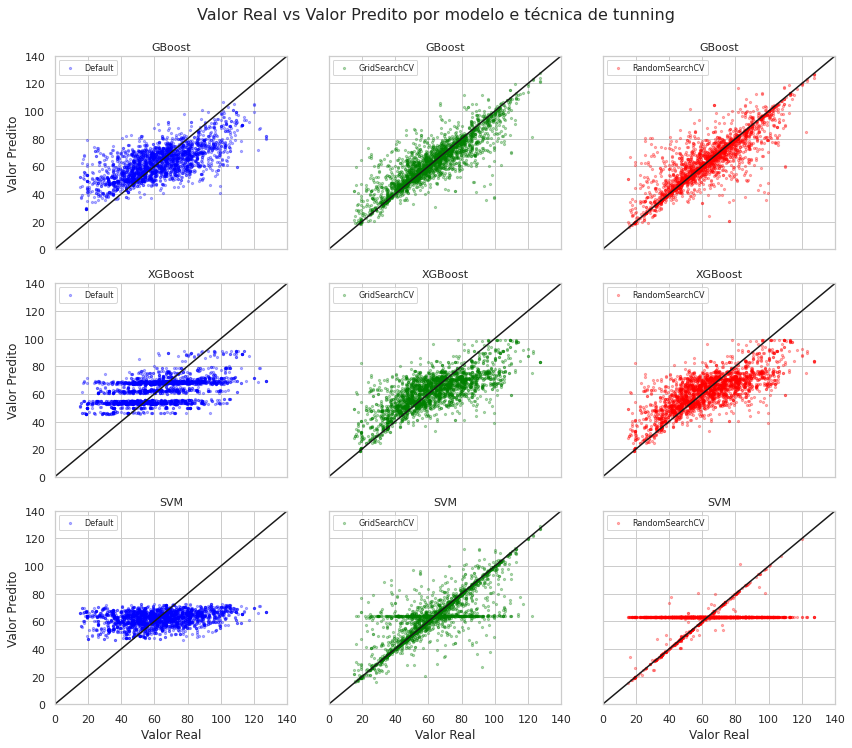

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.tight_layout(2);
plt.xlim(0,140)
plt.ylim(0,140)
sns.set(style="whitegrid")
plt.suptitle("Valor Real vs Valor Predito por modelo e técnica de tunning", y=1.03,fontsize=16)

x = [0,140]
y = [0,140]

#GBoost
axes[0,0].plot(x,y,"k-");
axes[0,0].scatter(x='y_real', y='y_pred_4A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[0,0].legend(loc="upper left", fontsize=8)
axes[0,0].set_ylabel('Valor Predito')
axes[0,0].set_xlabel('')
axes[0,0].set_title('GBoost', fontsize=11)

axes[0,1].plot(x,y,"k-");
axes[0,1].scatter(x='y_real', y='y_pred_4B', data=df_hist, c='green', s=5, alpha = 0.3, label = 'GridSearchCV')
axes[0,1].legend(loc="upper left", fontsize=8)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_title('GBoost', fontsize=11)

axes[0,2].plot(x,y,"k-");
axes[0,2].scatter(x='y_real', y='y_pred_4C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[0,2].legend(loc="upper left", fontsize=8)
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('')
axes[0,2].set_title('GBoost', fontsize=11)

#XGBoost
axes[1,0].plot(x,y,"k-");
axes[1,0].scatter(x='y_real', y='y_pred_5A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[1,0].legend(loc="upper left", fontsize=8)
axes[1,0].set_ylabel('Valor Predito')
axes[1,0].set_xlabel('')
axes[1,0].set_title('XGBoost', fontsize=11)

axes[1,1].plot(x,y,"k-");
axes[1,1].scatter(x='y_real', y='y_pred_5B', data=df_hist, c='green',s=5, alpha = 0.3, label = 'GridSearchCV')
axes[1,1].legend(loc="upper left", fontsize=8)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_title('XGBoost', fontsize=11)

axes[1,2].plot(x,y,"k-");
axes[1,2].scatter(x='y_real', y='y_pred_5C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[1,2].legend(loc="upper left", fontsize=8)
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('')
axes[1,2].set_title('XGBoost', fontsize=11)

#SVM
axes[2,0].plot(x,y,"k-");
axes[2,0].scatter(x='y_real', y='y_pred_6A', data=df_hist, c='blue', s=5, alpha = 0.3, label = 'Default')
axes[2,0].legend(loc="upper left", fontsize=8)
axes[2,0].set_ylabel('Valor Predito')
axes[2,0].set_xlabel('Valor Real')
axes[2,0].set_title('SVM', fontsize=11)

axes[2,1].plot(x,y,"k-");
axes[2,1].scatter(x='y_real', y='y_pred_6B', data=df_hist, c='green', s=5, alpha = 0.3, label = 'GridSearchCV')
axes[2,1].legend(loc="upper left", fontsize=8)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('Valor Real')
axes[2,1].set_title('SVM', fontsize=11)

axes[2,2].plot(x,y,"k-");
axes[2,2].scatter(x='y_real', y='y_pred_6C', data=df_hist, c='red', s=5, alpha = 0.3, label = 'RandomSearchCV')
axes[2,2].legend(loc="upper left", fontsize=8)
axes[2,2].set_ylabel('')
axes[2,2].set_xlabel('Valor Real')
axes[2,2].set_title('SVM', fontsize=11)

plt.savefig('RealVsPredito_2.png', dpi=300)

Em relação ao MAE e RMSE, em geral, ambas técnicas de tuning apresentam melhores resultados que a predição com hiperparamentros Default. É notável que no Random Search há casos em é possível obter uma melhora significa dos resultados, quando comparados aos resultados do Grid Search. No entanto, em alguns casos os resultados podem ser piores, o que realça a importância de realizar ambos para comparação. 

Nota-se que os melhores resultados para MAE foram realizados pelo modelo KNN, enquanto o melhor resultado para RMSE foi encontrado pelo GBoost. Por conta desta diferença, para a escolha melhor modelo, é preciso levar e conta o contexto do problema em questão. Caso seja um problema no qual há custos desproporcionalmente maiores para erros de predição altos, escolher com base no RMSE seria mais adequado, pois esta é uma métrica que penaliza com maior peso erros maiores.

Além disso, é possível utilizar os histogramas para melhor visualização e comparação da distribuição do módulo dos erros entre os modelos. Particularmente, a escolha por histograma de densidade de frequência, com contorno e sem as colunas, permitiu melhor visualização com overlapping entre as técnicas, para melhor comparação. Comparando, por exemplo, a área sob curvas é possível identificar, que no modelo SVM, Random Search têm o pior desempenho em relação a módulos de erros acima de 40, em relação a todos outros modelos Random Seach o justifica este ter o pior desempenho de RMSE. Já em relação ao modelo KNN é visível a concentração de erros pequenos, justificando seu bom desempenho.

Já nos gráficos Real vs Predito, o desempenho pode ser avaliado pela tendência dos pontos em se localizarem sob a linha diagonal. Com isto, destaca-se o modelos e Random Forest com um bom desempenho geral.
